# CIFAR 10 classification problem with an adapted network

## Importation of the libraries

In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras import regularizers
from keras.callbacks import LearningRateScheduler

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from IPython.display import SVG
import matplotlib.gridspec as gridspec
from sklearn.model_selection import cross_val_predict

## Importation and inspection of the data

In [0]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

num_classes = 10


y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [0]:
label_to_class={0 : 'airplane',
                1 : 'automobile',
                2 : 'bird',
                3 : 'cat',
                4 : 'deer',
                5 : 'dog',
                6 : 'frog',
                7 : 'horse',
                8 : 'ship',
                9 : 'truck'}

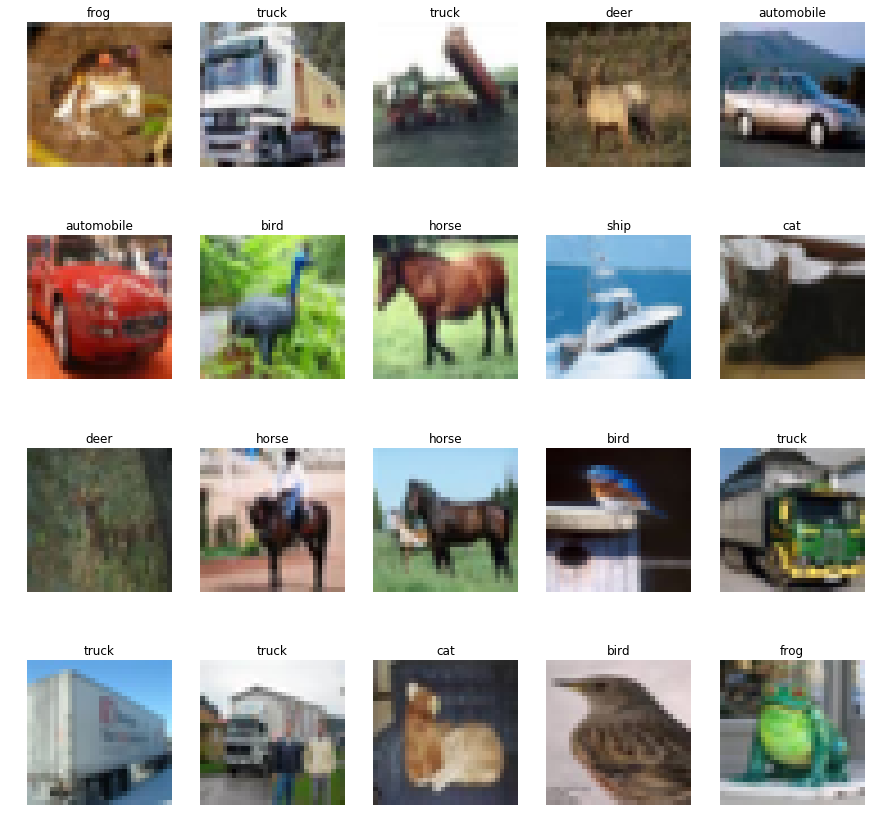

In [12]:
_,ax = plt.subplots(4,5, figsize = (15,15)) 
for i in range(4):
    for j in range(5):
        ax[i,j].imshow(x_train[5*i+j])
        ax[i,j].set_title(label_to_class[np.argmax(y_train[5*i+j])])
        ax[i,j].axis('off')

## Creation of the data generator

In [0]:
epochs = 130

#Image Generator
train_datagen = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

## Creation of the network

**This is a powerful network with many regularization features.**

**The activation function is the exponential linear unit, this activation speeds up the learning and leads to a better accuracy in deep neural networks.**

In [14]:
weight_decay = 1e-4

model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32,32,3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(128, activation="linear"))
model.add(Activation('elu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(0.0003), metrics=['accuracy'])
 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
__________

## Training the network

In [0]:
def lr_schedule(epoch):
    lrate = 0.0003
    if epoch > 80:
        lrate = 0.0001
    return lrate

In [16]:
training = model.fit_generator(train_datagen.flow(x_train, y_train, batch_size=32),
                               steps_per_epoch=len(x_train) / 32,
                               epochs=epochs,
                               validation_data=(x_test,y_test),
                               callbacks=[LearningRateScheduler(lr_schedule)])

W0721 17:09:59.253746 140089202685824 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/130
1563/1562 [==============================] - 41s 26ms/step - loss: 1.6534 - acc: 0.4222 - val_loss: 1.5630 - val_acc: 0.4910
Epoch 2/130
1563/1562 [==============================] - 35s 22ms/step - loss: 1.3028 - acc: 0.5463 - val_loss: 1.3298 - val_acc: 0.5658
Epoch 3/130
1563/1562 [==============================] - 35s 22ms/step - loss: 1.1339 - acc: 0.6094 - val_loss: 1.1535 - val_acc: 0.6255
Epoch 4/130
1563/1562 [==============================] - 35s 22ms/step - loss: 1.0381 - acc: 0.6483 - val_loss: 1.0752 - val_acc: 0.6619
Epoch 5/130
1563/1562 [==============================] - 35s 22ms/step - loss: 0.9746 - acc: 0.6717 - val_loss: 0.9459 - val_acc: 0.6870
Epoch 6/130
1563/1562 [==============================] - 35s 22ms/step - loss: 0.9210 - acc: 0.6939 - val_loss: 0.9860 - val_acc: 0.6859
Epoch 7/130
1563/1562 [==============================] - 35s 22ms/step - loss: 0.8854 - acc: 0.7074 - val_loss: 0.8273 - val_acc: 0.7371
Epoch 8/130
1563/1562 [==================

## Analysis of the results

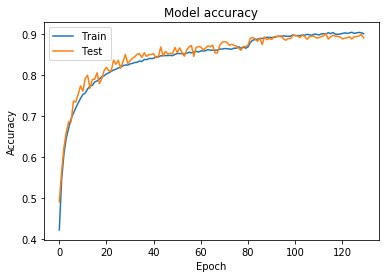

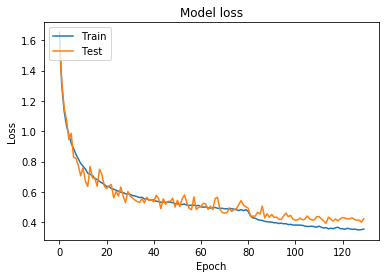

In [17]:
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**The L2 regularization combined with the dropout prevented the model from overfitting.**

**We observe a clear improvement around 80 epochs, it is when the learning rate is reduced.**

In [0]:
Y_predict = model.predict(x_test)
y_predict = np.argmax(Y_predict, axis = 1)

In [19]:
c=0

for i in range(len(y_predict)):
  if y_predict[i]==np.argmax(y_test[i]):
    c+=1

print("Accuracy :")
print(c/len(y_predict))

Accuracy :
0.891


**This model has a decent accuracy for a problem of this complexity.**

The tiny size of the images makes it difficult to discern patterns, even for a human.

In [20]:
conf_mx=confusion_matrix(np.argmax(y_test,axis=1), y_predict)
print('Confusion Matrix')
print(conf_mx)

Confusion Matrix
[[886  17  12   3   7   0   8   4  33  30]
 [  3 969   0   0   0   0   1   0   1  26]
 [ 36   4 852  10  21  13  42  10   2  10]
 [ 11   6  45 717  31  78  59  19  10  24]
 [  3   2  26  17 880   6  48  16   1   1]
 [  3   2  22  59  23 820  29  27   1  14]
 [  5   0  10   8   4   0 965   0   2   6]
 [  5   0   7   4  14  10   5 946   2   7]
 [ 30  16   2   0   1   1   3   1 921  25]
 [  2  36   1   1   1   0   1   1   3 954]]


In [0]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

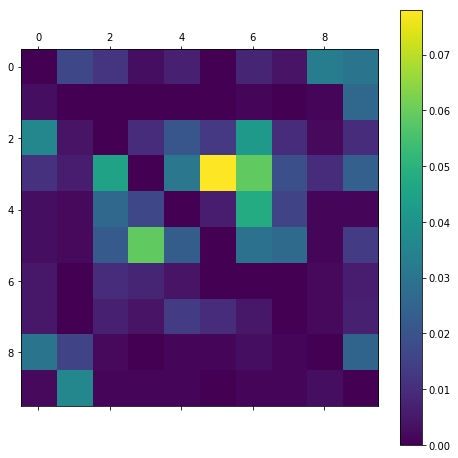

In [22]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)

plot_confusion_matrix(norm_conf_mx)

**The main source of confusion is between cats and dogs.**

In [0]:
def errors(y_test, y_predict, cl1, cl2, limit):

  _,ax = plt.subplots(limit//5,5, figsize = (15,15)) 
  c=0
  for k in range(len(y_predict)):
    if y_predict[k]==cl2 and np.argmax(y_test[k])==cl1 and c<limit:
      i=c//5
      j=c%5
      ax[i,j].imshow(x_test[k])
      ax[i,j].set_title('Predicted :'+label_to_class[y_predict[k]])
      ax[i,j].axis('off')

      c+=1

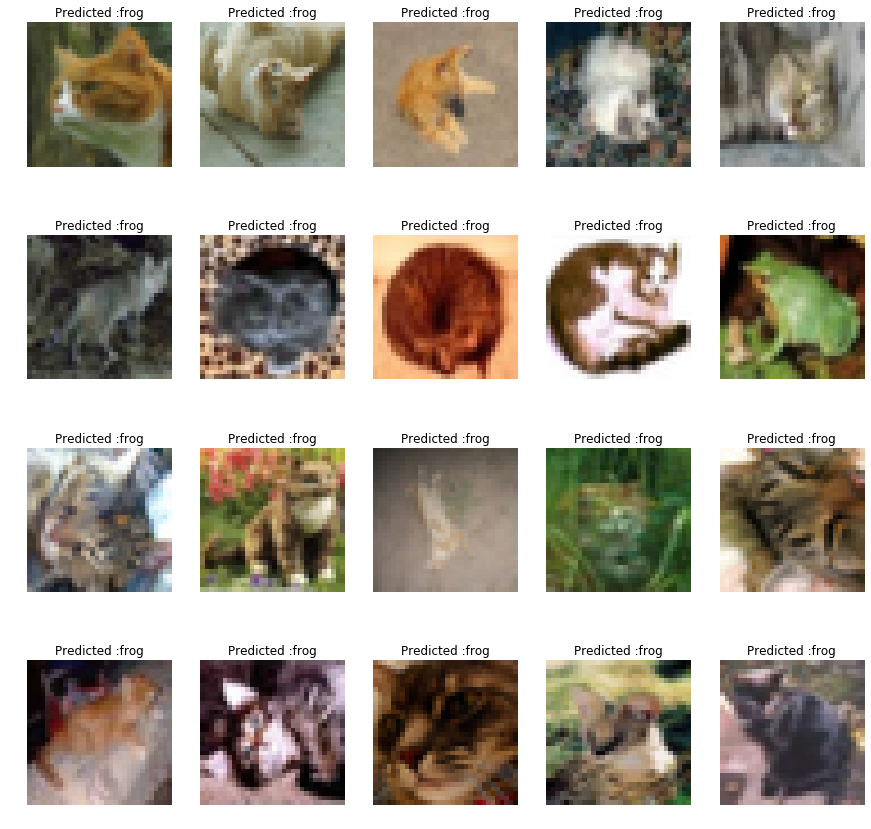

In [24]:
#Cats classified as frogs
errors(y_test,y_predict, 3, 6, 20)

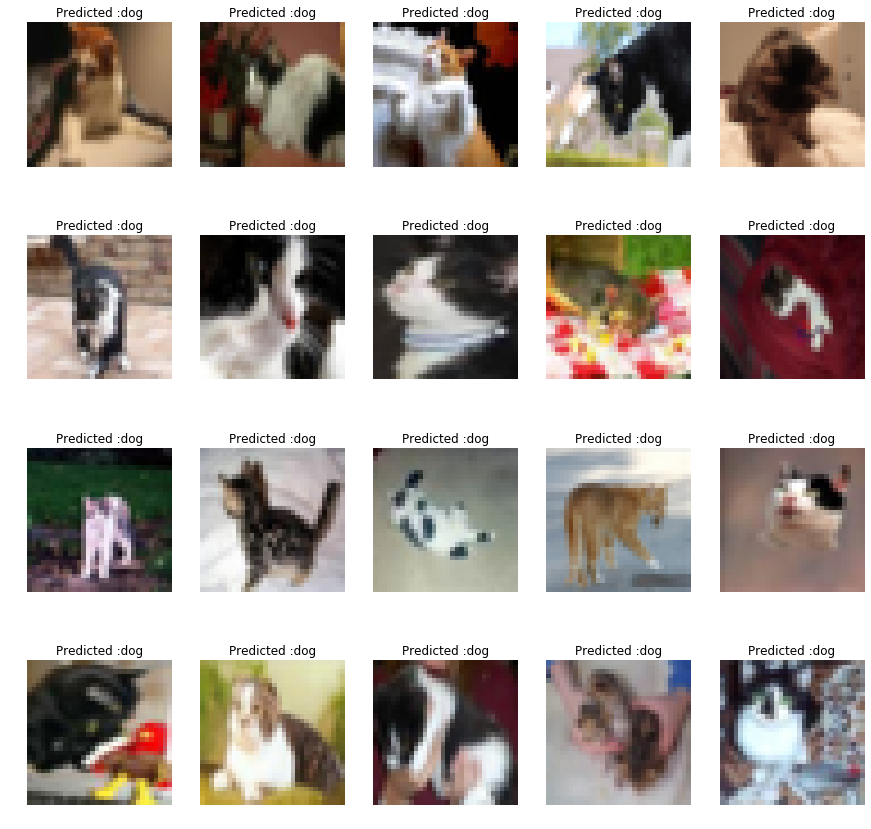

In [27]:
#Cats classified as dogs
errors(y_test,y_predict, 3, 5, 20)

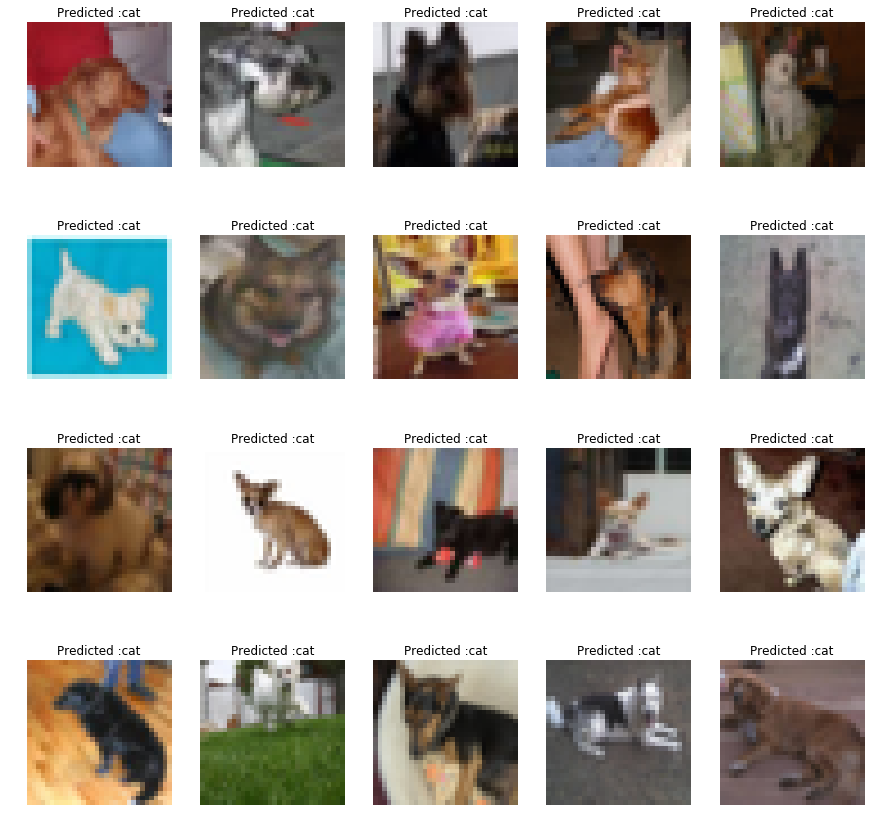

In [28]:
#Dogs classified as cats
errors(y_test,y_predict, 5, 3, 20)

**Most of these mistakes are quite obvious**

Given the learning curves, it is possible that the network needs some additional epochs with a reduced learning rate to reach its full potential.